In [26]:
from openpiv import tools, pyprocess, scaling, validation, filters
import matplotlib.pyplot as plt

import imageio
import pathlib

import os
import glob


import warnings
warnings.filterwarnings('ignore')


In [27]:


path = "/home/moritz/BWSyncAndShare/Studium/Masterarbeit/MA-Code/Animations"
ex = "res_base"

image_files = sorted(glob.glob(os.path.join(path, ex, "*.tiff")))
frames = [tools.imread(img) for img in image_files]


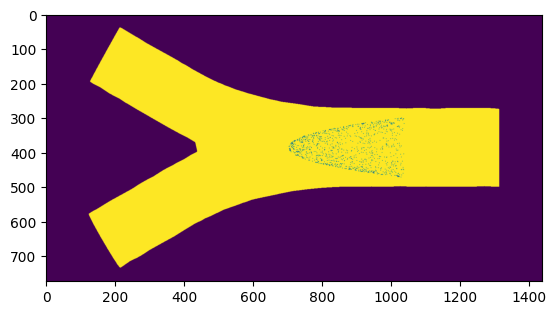

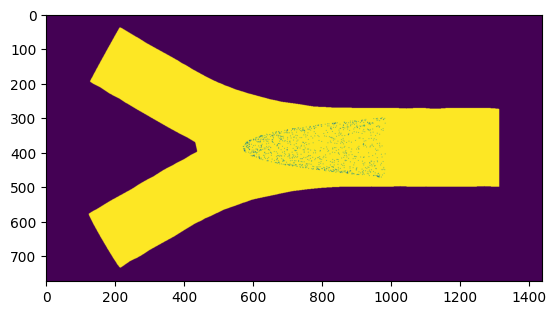

In [30]:

i = 5

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(frames[i])

fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.imshow(frames[i+1])

In [31]:
winsize = 32 # pixels, interrogation window size in frame A
searchsize = 38  # pixels, search area size in frame B
overlap = 17 # pixels, 50% overlap
dt = 0.02 # sec, time interval between the two frames

u0, v0, sig2noise = pyprocess.extended_search_area_piv(
    frames[i].astype(np.int32),
    frames[i+1].astype(np.int32),
    window_size=winsize,
    overlap=overlap,
    dt=dt,
    search_area_size=searchsize,
    sig2noise_method='peak2peak',
)

In [46]:

x, y = pyprocess.get_coordinates(
    image_size=frames[i].shape,
    search_area_size=searchsize,
    overlap=overlap,
)

u2, v2 = u0, v0

# plt.hist(sig2noise.flatten())
# invalid_mask = validation.sig2noise_val(
#     sig2noise,
#     threshold = 0.5,
# )
# u2, v2 = filters.replace_outliers(
#     u0, v0,
#     invalid_mask,
#     method='localmean',
#     max_iter=3,
#     kernel_size=3,
# )

# convert x,y to mm
# convert u,v to mm/sec
u3, v3 = u0, v0
x, y, u3, v3 = scaling.uniform(
    x, y, u2, v2,
    scaling_factor = 1,  # 96.52 pixels/millimeter
)

# 0,0 shall be bottom left, positive rotation rate is counterclockwise
x, y, u3, v3 = tools.transform_coordinates(x, y, u3, v3)

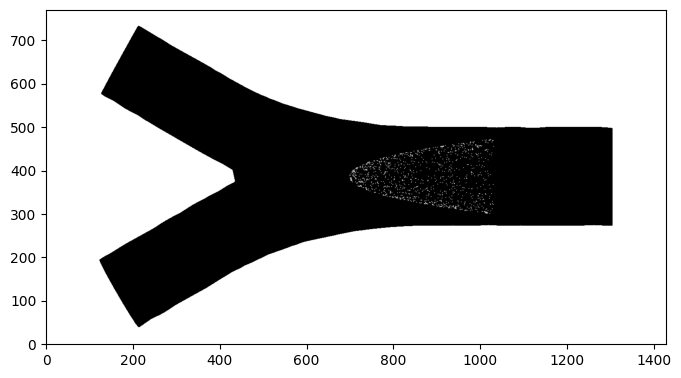

In [47]:
tools.save('exp1_001.txt' , x, y, u3, v3, invalid_mask)

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field(
    pathlib.Path('exp1_001.txt'),
    ax=ax, 
    # scaling_factor=96.52,
    #scale=50, # scale defines here the arrow length
    #width=0.0035, # width is the thickness of the arrow
    on_img=True, # overlay on the image
    image_name= os.path.join(path, ex, ex+f".{i:04d}.tiff")
);




'/home/moritz/BWSyncAndShare/Studium/Masterarbeit/MA-Code/Animations/res_base/res_base.0005*.tiff'